In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import optuna

In [3]:
df = pd.read_csv('0918_eda_one_hot.csv')
df_normalized = pd.read_csv('0916 착과수 최종 normalized.csv')

cluster_1에 해당하는 데이터/cluster_2에 해당하는 데이터/cluster_3에 해당하는 데이터로 나누기(데이터프레임 3개 만들기)

In [4]:
index1 = df[df['cluster_1']==1].index
df1 = df_normalized.iloc[index1]
df1

,STRG_DT,FRST_TREE_CNT,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD
0,2022-01-01 0:00,0.278421,0.084880,0.914160,0.067609,-3.475634,0.348886,-0.801951,0.109357
1,2022-01-01 0:10,0.278421,0.120558,1.869452,0.067609,-3.425997,0.348886,-0.801951,0.109357
2,2022-01-01 0:20,0.278421,0.227592,1.522073,0.067609,-3.392906,0.229860,-0.801951,0.109357
3,2022-01-01 0:30,0.278421,0.203807,1.348384,0.067609,-3.409452,0.309210,-0.801951,0.109357
4,2022-01-01 0:40,0.278421,0.215699,1.319436,0.067609,-3.459089,0.553875,-0.801951,0.109357
...,...,...,...,...,...,...,...,...,...
9211,2022-03-05 23:10,1.239226,-0.283793,-0.735889,0.067609,0.263695,0.725802,-0.801951,-1.160067
9212,2022-03-05 23:20,1.239226,-0.248115,-0.750363,0.067609,0.280241,0.573713,-0.801951,-1.160067
9213,2022-03-05 23:30,1.239226,-0.224330,-0.764837,-0.081994,0.280241,0.613388,-0.801951,-1.160067
9214,2022-03-05 23:40,1.239226,-0.200544,-0.764837,-0.081994,0.263695,0.653063,-0.801951,-1.160067


In [5]:
index2 = df[df['cluster_2']==1].index
df2 = df_normalized.iloc[index2]
df2

,STRG_DT,FRST_TREE_CNT,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD
9216,2022-03-06 0:00,1.239226,-0.152974,-0.779311,-0.081994,0.280241,0.653063,-0.801951,-0.431324
9217,2022-03-06 0:10,1.239226,-0.129188,-0.793785,-0.081994,0.263695,0.573713,-0.801951,-0.431324
9218,2022-03-06 0:20,1.239226,-0.129188,-0.808259,-0.111915,0.280241,0.573713,-0.801951,-0.431324
9219,2022-03-06 0:30,1.239226,-0.295686,-0.822733,-0.156795,0.247150,0.474524,-0.801951,-0.431324
9220,2022-03-06 0:40,1.239226,-0.378934,-0.866156,-0.201676,0.180967,0.381948,-0.801951,-0.431324
...,...,...,...,...,...,...,...,...,...
18427,2022-05-08 23:10,-0.394142,-0.271900,-0.605621,-0.530802,-0.034127,0.877890,0.200351,0.955640
18428,2022-05-08 23:20,-0.394142,-0.248115,-0.634570,-0.530802,-0.067219,0.877890,-0.200570,0.955640
18429,2022-05-08 23:30,-0.394142,-0.248115,-0.620096,-0.530802,0.032055,0.877890,-0.200570,0.955640
18430,2022-05-08 23:40,-0.394142,-0.271900,-0.591147,-0.530802,0.048601,0.877890,-0.200570,0.955640


In [6]:
index3 = df[df['cluster_3']==1].index
df3 = df_normalized.iloc[index3]
df3

,STRG_DT,FRST_TREE_CNT,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD
18432,2022-05-09 0:00,-0.394142,-0.307578,-0.576673,-0.530802,0.081693,0.877890,-0.200570,1.848938
18433,2022-05-09 0:10,-0.394142,-0.367042,-0.576673,-0.530802,0.098238,0.877890,-0.200570,1.848938
18434,2022-05-09 0:20,-0.394142,-0.343256,-0.591147,-0.530802,0.032055,0.877890,0.200351,1.848938
18435,2022-05-09 0:30,-0.394142,-0.355149,-0.663518,-0.530802,0.015510,0.877890,0.200351,1.848938
18436,2022-05-09 0:40,-0.394142,-0.378934,-0.750363,-0.530802,-0.001036,0.877890,0.200351,1.848938
...,...,...,...,...,...,...,...,...,...
26059,2022-06-30 23:10,-1.451028,-0.331364,0.190455,-1.278816,-0.232676,0.289373,0.801733,-0.877973
26060,2022-06-30 23:20,-1.451028,-0.331364,0.190455,-1.278816,-0.232676,0.315823,0.801733,-0.877973
26061,2022-06-30 23:30,-1.451028,-0.307578,0.204929,-1.278816,-0.232676,0.335660,0.801733,-0.877973
26062,2022-06-30 23:40,-1.451028,-0.260008,0.190455,-1.278816,-0.232676,0.362111,0.801733,-0.877973


In [7]:
X_1 = df1.iloc[:, 2:]
y_1 = df1.iloc[:,1]

X_2 = df2.iloc[:, 2:]
y_2 = df2.iloc[:,1]

X_3 = df3.iloc[:, 2:]
y_3 = df3.iloc[:,1]

In [8]:
# 다중선형회귀 모델 생성 및 적합
model_1 = LinearRegression()
model_1.fit(X_1, y_1)

model_2 = LinearRegression()
model_2.fit(X_2, y_2)

model_3 = LinearRegression()
model_3.fit(X_3, y_3)

LinearRegression()

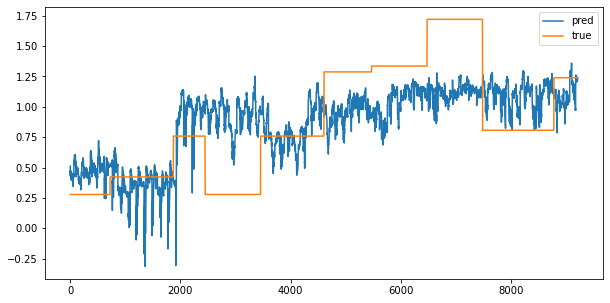

[-0.03989596 -0.0876675  -0.08624795  0.09077167 -0.06470212 -0.00843519
 -0.17787886]
0.952123819642242


In [9]:
y_pred = model_1.predict(X_1)

plt.figure(figsize=(10,5))
plt.plot(np.array(y_pred),label = "pred")
plt.plot(np.array(y_1),label = "true")
plt.legend()
plt.show()

coefficients = model_1.coef_
intercept = model_1.intercept_

print(coefficients)
print(intercept)

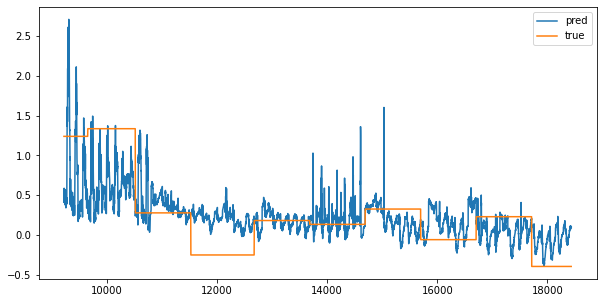

[ 0.07251473 -0.01580854  0.01225911 -0.07975208 -0.6473647  -0.04756969
 -0.10726344]
0.7811922032234933


In [14]:
y_pred = model_2.predict(X_2)

plt.figure(figsize=(10,5))
x_values = np.arange(9216, 18432) 
plt.plot(x_values, np.array(y_pred), label="pred")
plt.plot(x_values, np.array(y_2), label="true")
plt.legend()
plt.show()

coefficients = model_2.coef_
intercept = model_2.intercept_

print(coefficients)
print(intercept)

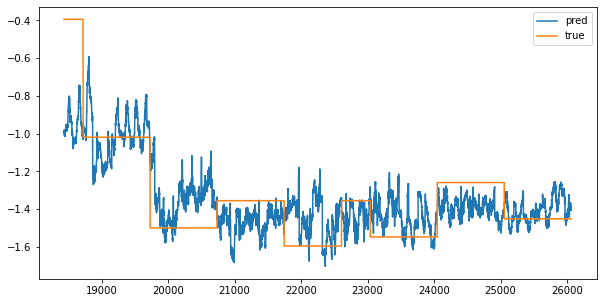

[-0.23637299  0.02159887  0.14726591  0.03325523  0.1042987  -0.01527939
  0.07989331]
-1.2231357152111786


In [16]:
y_pred = model_3.predict(X_3)

plt.figure(figsize=(10,5))
x_values = np.arange(18432, 26064) 
plt.plot(x_values, np.array(y_pred), label="pred")
plt.plot(x_values, np.array(y_3), label="true")
plt.legend()
plt.show()

coefficients = model_3.coef_
intercept = model_3.intercept_

print(coefficients)
print(intercept)

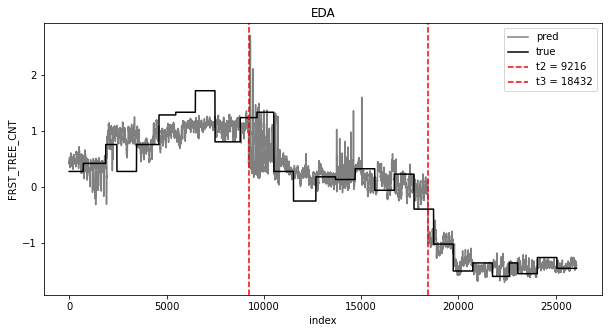

In [12]:
y_pred_1 = model_1.predict(X_1)
y_pred_2 = model_2.predict(X_2)
y_pred_3 = model_3.predict(X_3)

y_pred_df1 = pd.DataFrame({'FRST_TREE_CNT': y_pred_1})
y_pred_df2 = pd.DataFrame({'FRST_TREE_CNT': y_pred_2})
y_pred_df3 = pd.DataFrame({'FRST_TREE_CNT': y_pred_3})
combined_y_pred = pd.concat([y_pred_df1, y_pred_df2, y_pred_df3], ignore_index=True)

y_1_df = pd.DataFrame({'FRST_TREE_CNT': y_1})
y_2_df = pd.DataFrame({'FRST_TREE_CNT': y_2})
y_3_df = pd.DataFrame({'FRST_TREE_CNT': y_3})
combined_y = pd.concat([y_1_df, y_2_df, y_3_df], ignore_index=True)

plt.figure(figsize=(10,5))
plt.plot(np.array(combined_y_pred),label = "pred", color = 'gray')
plt.plot(np.array(combined_y),label = "true", color = 'black')
plt.axvline(x=9216, color='r', linestyle='--', label='t2 = 9216')
plt.axvline(x=18432, color='r', linestyle='--', label='t3 = 18432')
plt.xlabel('index')  # x축 이름 설정
plt.ylabel('FRST_TREE_CNT')  # y축 이름 설정
plt.title('EDA')  # 그래프 제목 설정

plt.legend()
plt.show()